# Toxic Comment Classification (NLP)


In [ ]:
#Importing Libraries
import numpy as np
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow import keras
from nltk.corpus import stopwords
import os

# used to make graph appear below cell in notebook.
%matplotlib inline 

## Importing Data & Modifying Dataframe


In [ ]:
train_data = pd.read_csv('train.csv') # Reading training Data using Pandas
test_data = pd.read_csv('test.csv') # Reading testing data using Pandas

# train_data.head(10) # Uncomment to print first 10 data entries 

In [ ]:
# Adding the count of characters and the count of the words in a comment to the dataframe

In [ ]:
train_data['char_count'] = train_data['comment_text'].apply(len) #adding character count
train_data['word_count'] = train_data['comment_text'].apply(lambda x: len(x.split())) #adding word count

In [ ]:
# train_data.head(10) # Uncomment to print first 10 data entries of modified data frame 

## Data Exploration

In [ ]:
# train_data['comment_text'][0] # Uncomment to print first comment entry in the dataset.

In [ ]:
def vocabulary(comments):
    '''
      This function will take an array of string as parameter and 
      will return the count of the word in form of a dictionary, with key as words
      and values as count of that word.

      If word not already present in dictionary it will add that word and make count 1 for that word
      else, it will increase count by 1.

      (vocab.get(word, 0) returns either current count or None depending if the word exists in the dictionary(vocab))
    '''
    vocab ={}
    for sentence in comments:
        for word in sentence:
            vocab[word] = vocab.get(word, 0) + 1 
    return vocab

In [ ]:
'''
Splitting sentences into words and converting them into numpy arrays.
'''
sentences = train_data['comment_text'].apply(lambda x: x.split()).to_numpy()
# sentences[0]
# print(sentences)

In [ ]:
'''
Running all sentences through the vocabulary function.
'''
vocab = vocabulary(sentences)
# sorted(vocab.items(), key = lambda x: x[1], reverse=True) # Uncomment to print word count from highest to lowest. 

In [ ]:
# help(vocabulary) # Uncomment to view details of the vocabulary function

In [ ]:
# Filtering rows for toxic, severe_toxic, obscene	threat,	insult,	identity_hate
# (Assigning sentences to variables based on which classification they are true to.)

toxic_row = train_data[train_data['toxic']==1]['comment_text'].apply(lambda x: x.lower().split()).to_numpy()

severe_toxic_row = train_data[train_data['severe_toxic']==1]['comment_text'].apply(lambda x: x.lower().split()).to_numpy()

obscene_row = train_data[train_data['obscene'] == 1]['comment_text'].apply(lambda x: x.lower().split()).to_numpy()

threat_row = train_data[train_data['threat'] == 1]['comment_text'].apply(lambda x: x.lower().split()).to_numpy()

insult_row = train_data[train_data['insult'] == 1]['comment_text'].apply(lambda x: x.lower().split()).to_numpy()

identity_hate_row = train_data[train_data['identity_hate'] == 1]['comment_text'].apply(lambda x: x.lower().split()).to_numpy()


# print(toxic_row[0])
# print(severe_toxic_row[-1])
# print(obscene_row[0])
# print(threat_row[1])
# print(insult_row[0])
# print(identity_hate_row[0])

## N-Grams Analysis
<a href = "https://www.kaggle.com/getting-started/186392"> Read from this to get familiar with N-Grams NLP, (if not already) </a>

In [ ]:
# Probably need to download stopwords everytime on google Collab
import nltk
nltk.download('stopwords') # stopwords is used for pre-processing data to filter out useless data like commonly used words (such as “the”, “a”, “an”, “in”, etc.)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
stops = stopwords.words('english') # Only english stopwords are being considered for the project.

In [ ]:
def generate_ngrams(sentence, n_gram):
    tokens = [token for token in sentence if token != '' if token not in stops]
    ngrams = zip(*[tokens[i:] for i in range(n_gram)])
    ngrams_list = []
    for ngram in ngrams:
        ngrams_list.append(" ".join(ngram))
    return ngrams_list

In [ ]:
def gen_ngrams_vocab(sentences, n_gram = 1):
    n_gram_dict = {}
    for sentence in sentences:
        for token in generate_ngrams(sentence, n_gram):
            n_gram_dict[token] = n_gram_dict.get(token, 0) + 1
    return n_gram_dict

### Unigram analysis

In [ ]:
toxic_unigram_dict = gen_ngrams_vocab(toxic_row, 1)
severe_toxic_unigram_dict = gen_ngrams_vocab(severe_toxic_row, 1)
obscene_unigram_dict = gen_ngrams_vocab(obscene_row, 1)
threat_unigram_dict = gen_ngrams_vocab(threat_row, 1)
insult_unigram_dict = gen_ngrams_vocab(insult_row, 1)
identity_hate_unigram_dict = gen_ngrams_vocab(identity_hate_row, 1)

In [ ]:
toxic_unigram_DF = pd.DataFrame(sorted(toxic_unigram_dict.items(), key = lambda x: x[1])[::-1])
# toxic_unigram_DF
severe_toxic_DF = pd.DataFrame(sorted(severe_toxic_unigram_dict.items(), key = lambda x: x[1])[::-1])
# severe_toxic_DF
obscene_unigram_DF = pd.DataFrame(sorted(obscene_unigram_dict.items(), key = lambda x: x[1])[::-1])
# obscene_unigram_DF
threat_unigram_DF = pd.DataFrame(sorted(threat_unigram_dict.items(), key = lambda x: x[1])[::-1])
# threat_unigram_DF
insult_unigram_DF =pd.DataFrame(sorted(insult_unigram_dict.items(), key = lambda x: x[1])[::-1])
# insult_unigram_DF
identity_hate_unigram_DF = pd.DataFrame(sorted(identity_hate_unigram_dict.items(), key = lambda x: x[1])[::-1])
# identity_hate_unigram_DF

In [ ]:
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

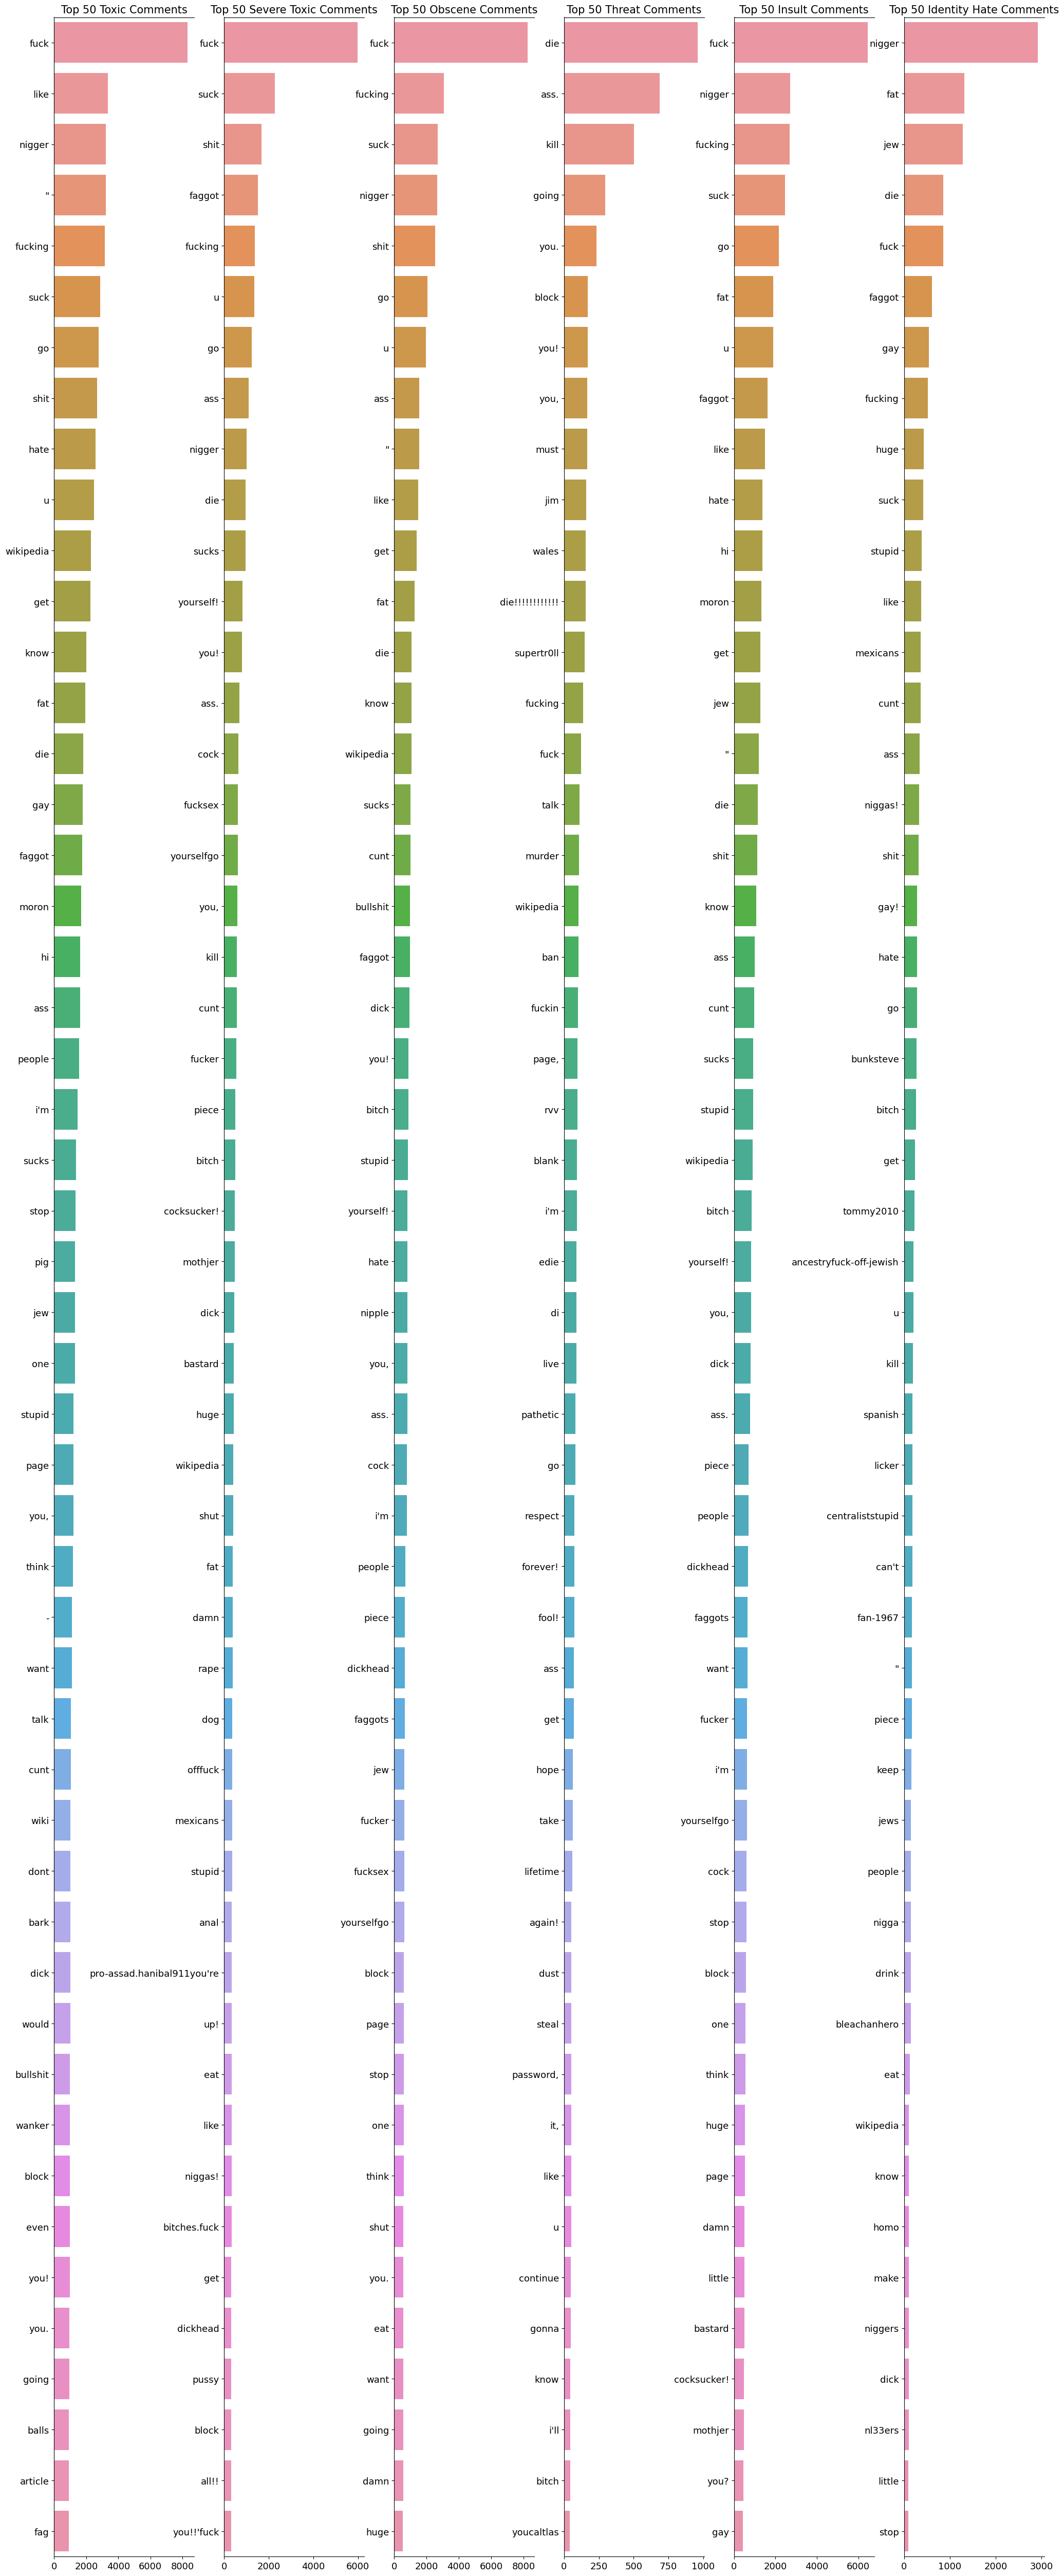

In [ ]:
fig, axes = plt.subplots(ncols = 6, figsize = (20, 50), dpi=100)
plt.tight_layout()

num = 50
sns.barplot(y=toxic_unigram_DF[0].values[:num], x =toxic_unigram_DF[1].values[:num], ax=axes[0])
sns.barplot(y=severe_toxic_DF[0].values[:num], x =severe_toxic_DF[1].values[:num], ax=axes[1])
sns.barplot(y=obscene_unigram_DF[0].values[:num], x =obscene_unigram_DF[1].values[:num], ax=axes[2])
sns.barplot(y=threat_unigram_DF[0].values[:num], x =threat_unigram_DF[1].values[:num], ax=axes[3])
sns.barplot(y=insult_unigram_DF[0].values[:num], x =insult_unigram_DF[1].values[:num], ax=axes[4])
sns.barplot(y=identity_hate_unigram_DF[0].values[:num], x =identity_hate_unigram_DF[1].values[:num], ax=axes[5])

for i in range(6):
    axes[i].spines['right'].set_visible(False)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='x', labelsize = 13)
    axes[i].tick_params(axis='y', labelsize = 13)
    
axes[0].set_title(f'Top {num} Toxic Comments', fontsize = 15)
axes[1].set_title(f'Top {num} Severe Toxic Comments', fontsize = 15)
axes[2].set_title(f'Top {num} Obscene Comments', fontsize = 15)
axes[3].set_title(f'Top {num} Threat Comments', fontsize = 15)
axes[4].set_title(f'Top {num} Insult Comments', fontsize = 15)
axes[5].set_title(f'Top {num} Identity Hate Comments', fontsize = 15)

plt.show()

In [ ]:
# Aise hi similarly Bigram and Trigram ke liye bhi kar lena, kyuki max agar gaali hogi , to 2-3 words 

###Bigram Analysis

In [ ]:
def gen_ngrams_vocab(sentences, n_gram = 2):
    n_gram_dict = {}
    for sentence in sentences:
        for token in generate_ngrams(sentence, n_gram):
            n_gram_dict[token] = n_gram_dict.get(token, 0) + 1
    return n_gram_dict

In [ ]:
toxic_bigram_dict = gen_ngrams_vocab(toxic_row, 2)
severe_toxic_bigram_dict = gen_ngrams_vocab(severe_toxic_row, 2)
obscene_bigram_dict = gen_ngrams_vocab(obscene_row, 2)
threat_bigram_dict = gen_ngrams_vocab(threat_row, 2)
insult_bigram_dict = gen_ngrams_vocab(insult_row, 2)
identity_hate_bigram_dict = gen_ngrams_vocab(identity_hate_row, 2)

In [ ]:
toxic_bigram_DF = pd.DataFrame(sorted(toxic_bigram_dict.items(), key = lambda x: x[1])[::-1])

severe_toxic_DF = pd.DataFrame(sorted(severe_toxic_bigram_dict.items(), key = lambda x: x[1])[::-1])

obscene_bigram_DF = pd.DataFrame(sorted(obscene_bigram_dict.items(), key = lambda x: x[1])[::-1])

threat_bigram_DF = pd.DataFrame(sorted(threat_bigram_dict.items(), key = lambda x: x[1])[::-1])

insult_bigram_DF =pd.DataFrame(sorted(insult_bigram_dict.items(), key = lambda x: x[1])[::-1])

identity_hate_bigram_DF = pd.DataFrame(sorted(identity_hate_bigram_dict.items(), key = lambda x: x[1])[::-1])


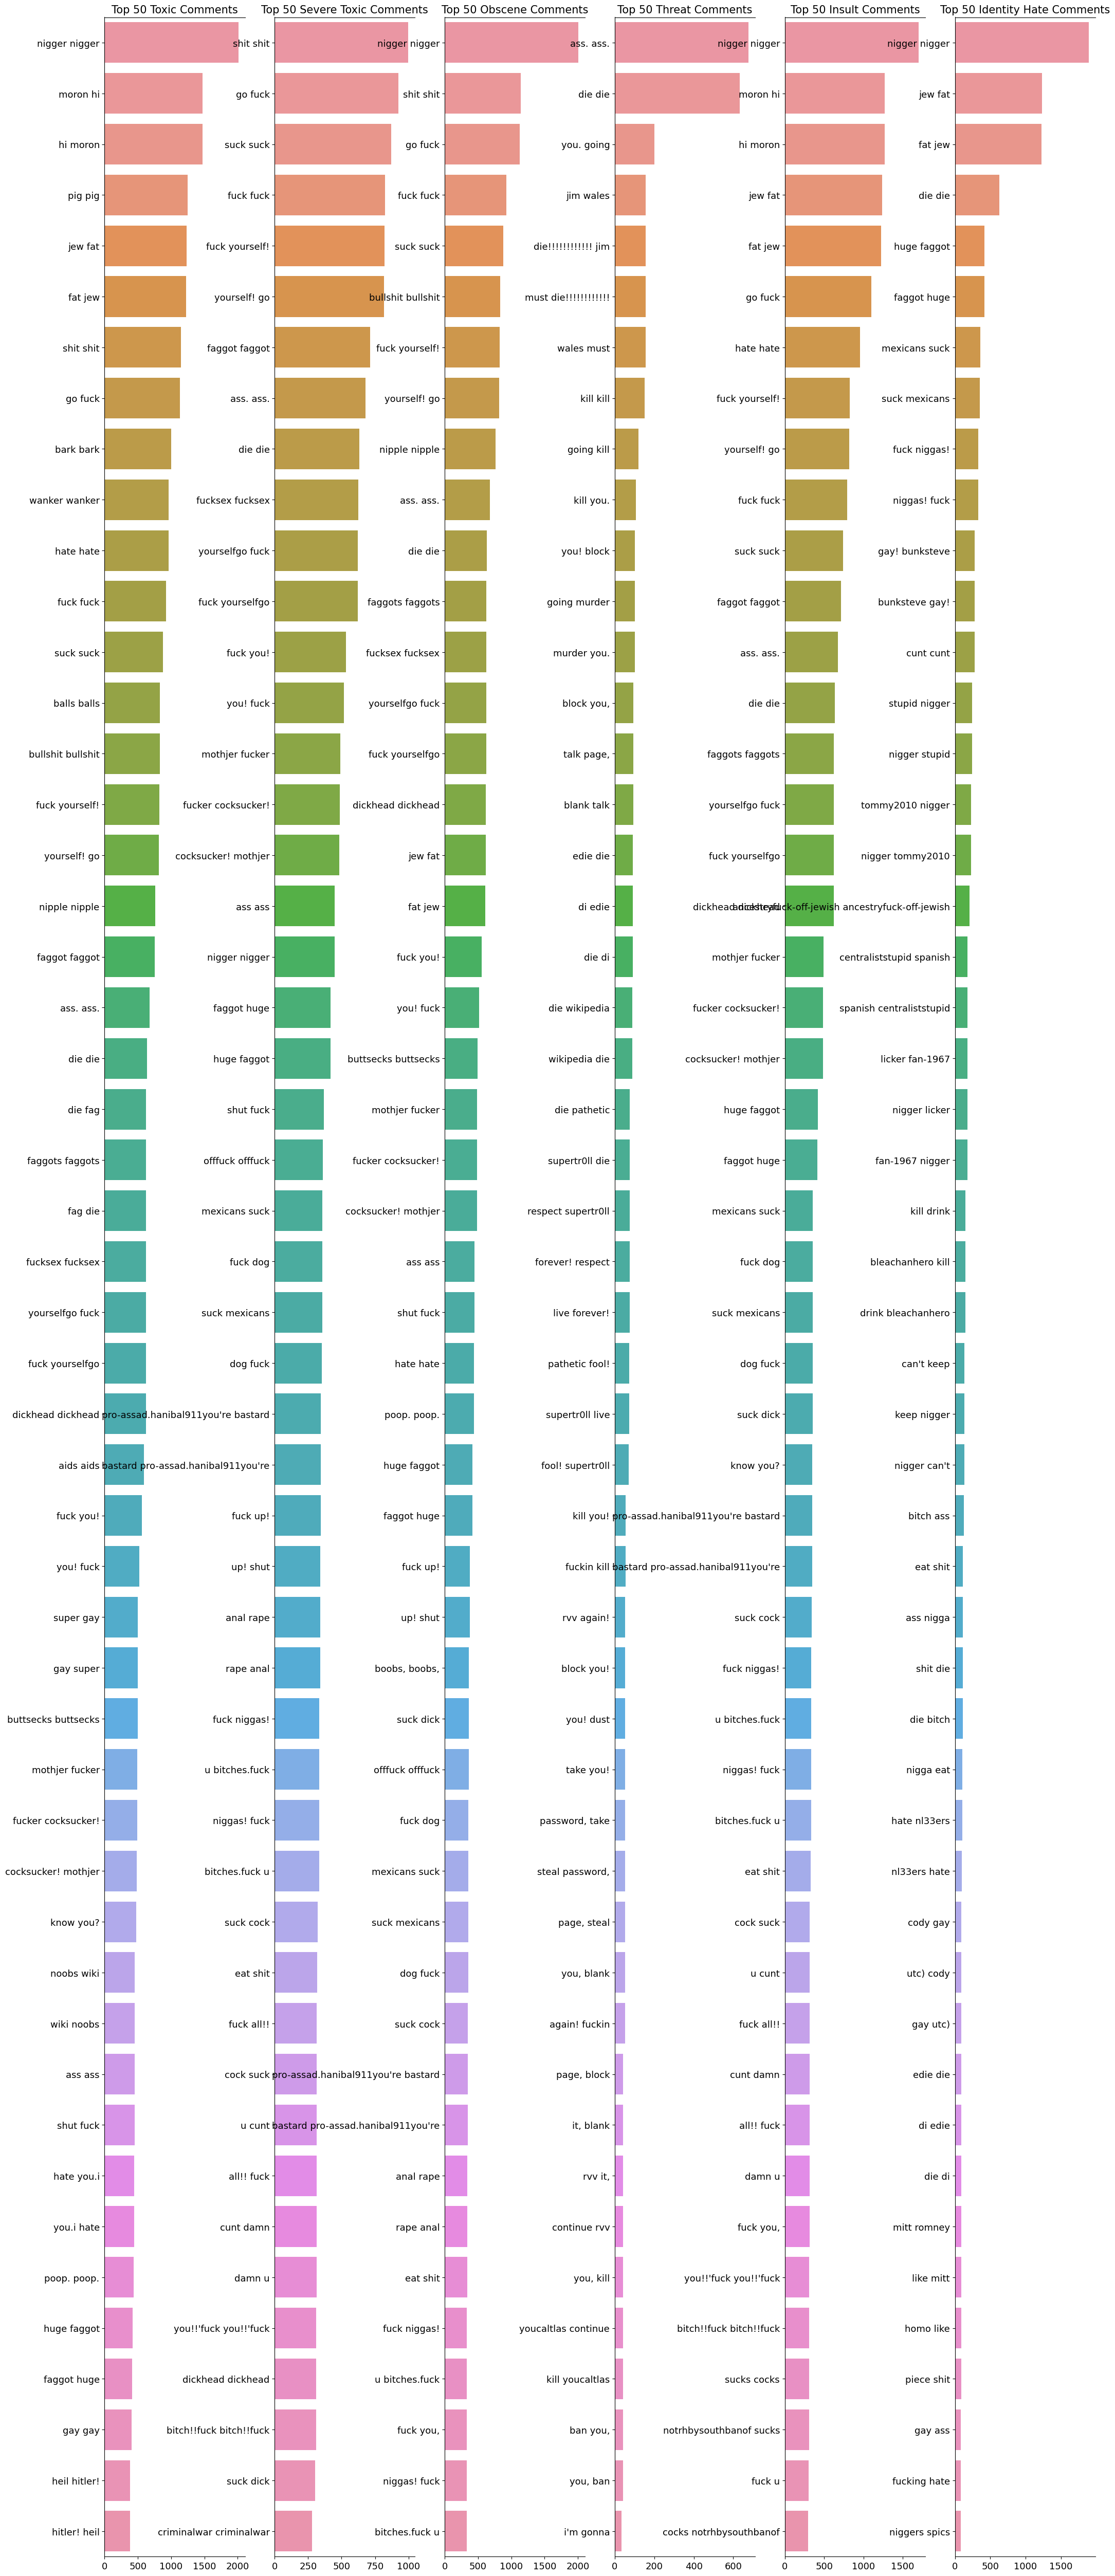

In [ ]:
fig, axes = plt.subplots(ncols = 6, figsize = (20, 50), dpi=100)
plt.tight_layout()

num = 50
sns.barplot(y=toxic_bigram_DF[0].values[:num], x =toxic_bigram_DF[1].values[:num], ax=axes[0])
sns.barplot(y=severe_toxic_DF[0].values[:num], x =severe_toxic_DF[1].values[:num], ax=axes[1])
sns.barplot(y=obscene_bigram_DF[0].values[:num], x =obscene_bigram_DF[1].values[:num], ax=axes[2])
sns.barplot(y=threat_bigram_DF[0].values[:num], x =threat_bigram_DF[1].values[:num], ax=axes[3])
sns.barplot(y=insult_bigram_DF[0].values[:num], x =insult_bigram_DF[1].values[:num], ax=axes[4])
sns.barplot(y=identity_hate_bigram_DF[0].values[:num], x =identity_hate_bigram_DF[1].values[:num], ax=axes[5])

for i in range(6):
    axes[i].spines['right'].set_visible(False)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='x', labelsize = 13)
    axes[i].tick_params(axis='y', labelsize = 13)
    
axes[0].set_title(f'Top {num} Toxic Comments', fontsize = 15)
axes[1].set_title(f'Top {num} Severe Toxic Comments', fontsize = 15)
axes[2].set_title(f'Top {num} Obscene Comments', fontsize = 15)
axes[3].set_title(f'Top {num} Threat Comments', fontsize = 15)
axes[4].set_title(f'Top {num} Insult Comments', fontsize = 15)
axes[5].set_title(f'Top {num} Identity Hate Comments', fontsize = 15)

plt.show()

###Trigram Analysis

In [ ]:
def gen_ngrams_vocab(sentences, n_gram = 3):
    n_gram_dict = {}
    for sentence in sentences:
        for token in generate_ngrams(sentence, n_gram):
            n_gram_dict[token] = n_gram_dict.get(token, 0) + 1
    return n_gram_dict

In [ ]:
toxic_trigram_dict = gen_ngrams_vocab(toxic_row, 3)
severe_toxic_trigram_dict = gen_ngrams_vocab(severe_toxic_row, 3)
obscene_trigram_dict = gen_ngrams_vocab(obscene_row, 3)
threat_trigram_dict = gen_ngrams_vocab(threat_row, 3)
insult_trigram_dict = gen_ngrams_vocab(insult_row, 3)
identity_hate_trigram_dict = gen_ngrams_vocab(identity_hate_row, 3)

In [ ]:
toxic_trigram_DF = pd.DataFrame(sorted(toxic_trigram_dict.items(), key = lambda x: x[1])[::-1])

severe_toxic_DF = pd.DataFrame(sorted(severe_toxic_trigram_dict.items(), key = lambda x: x[1])[::-1])

obscene_trigram_DF = pd.DataFrame(sorted(obscene_trigram_dict.items(), key = lambda x: x[1])[::-1])

threat_trigram_DF = pd.DataFrame(sorted(threat_trigram_dict.items(), key = lambda x: x[1])[::-1])

insult_trigram_DF =pd.DataFrame(sorted(insult_trigram_dict.items(), key = lambda x: x[1])[::-1])

identity_hate_trigram_DF = pd.DataFrame(sorted(identity_hate_trigram_dict.items(), key = lambda x: x[1])[::-1])


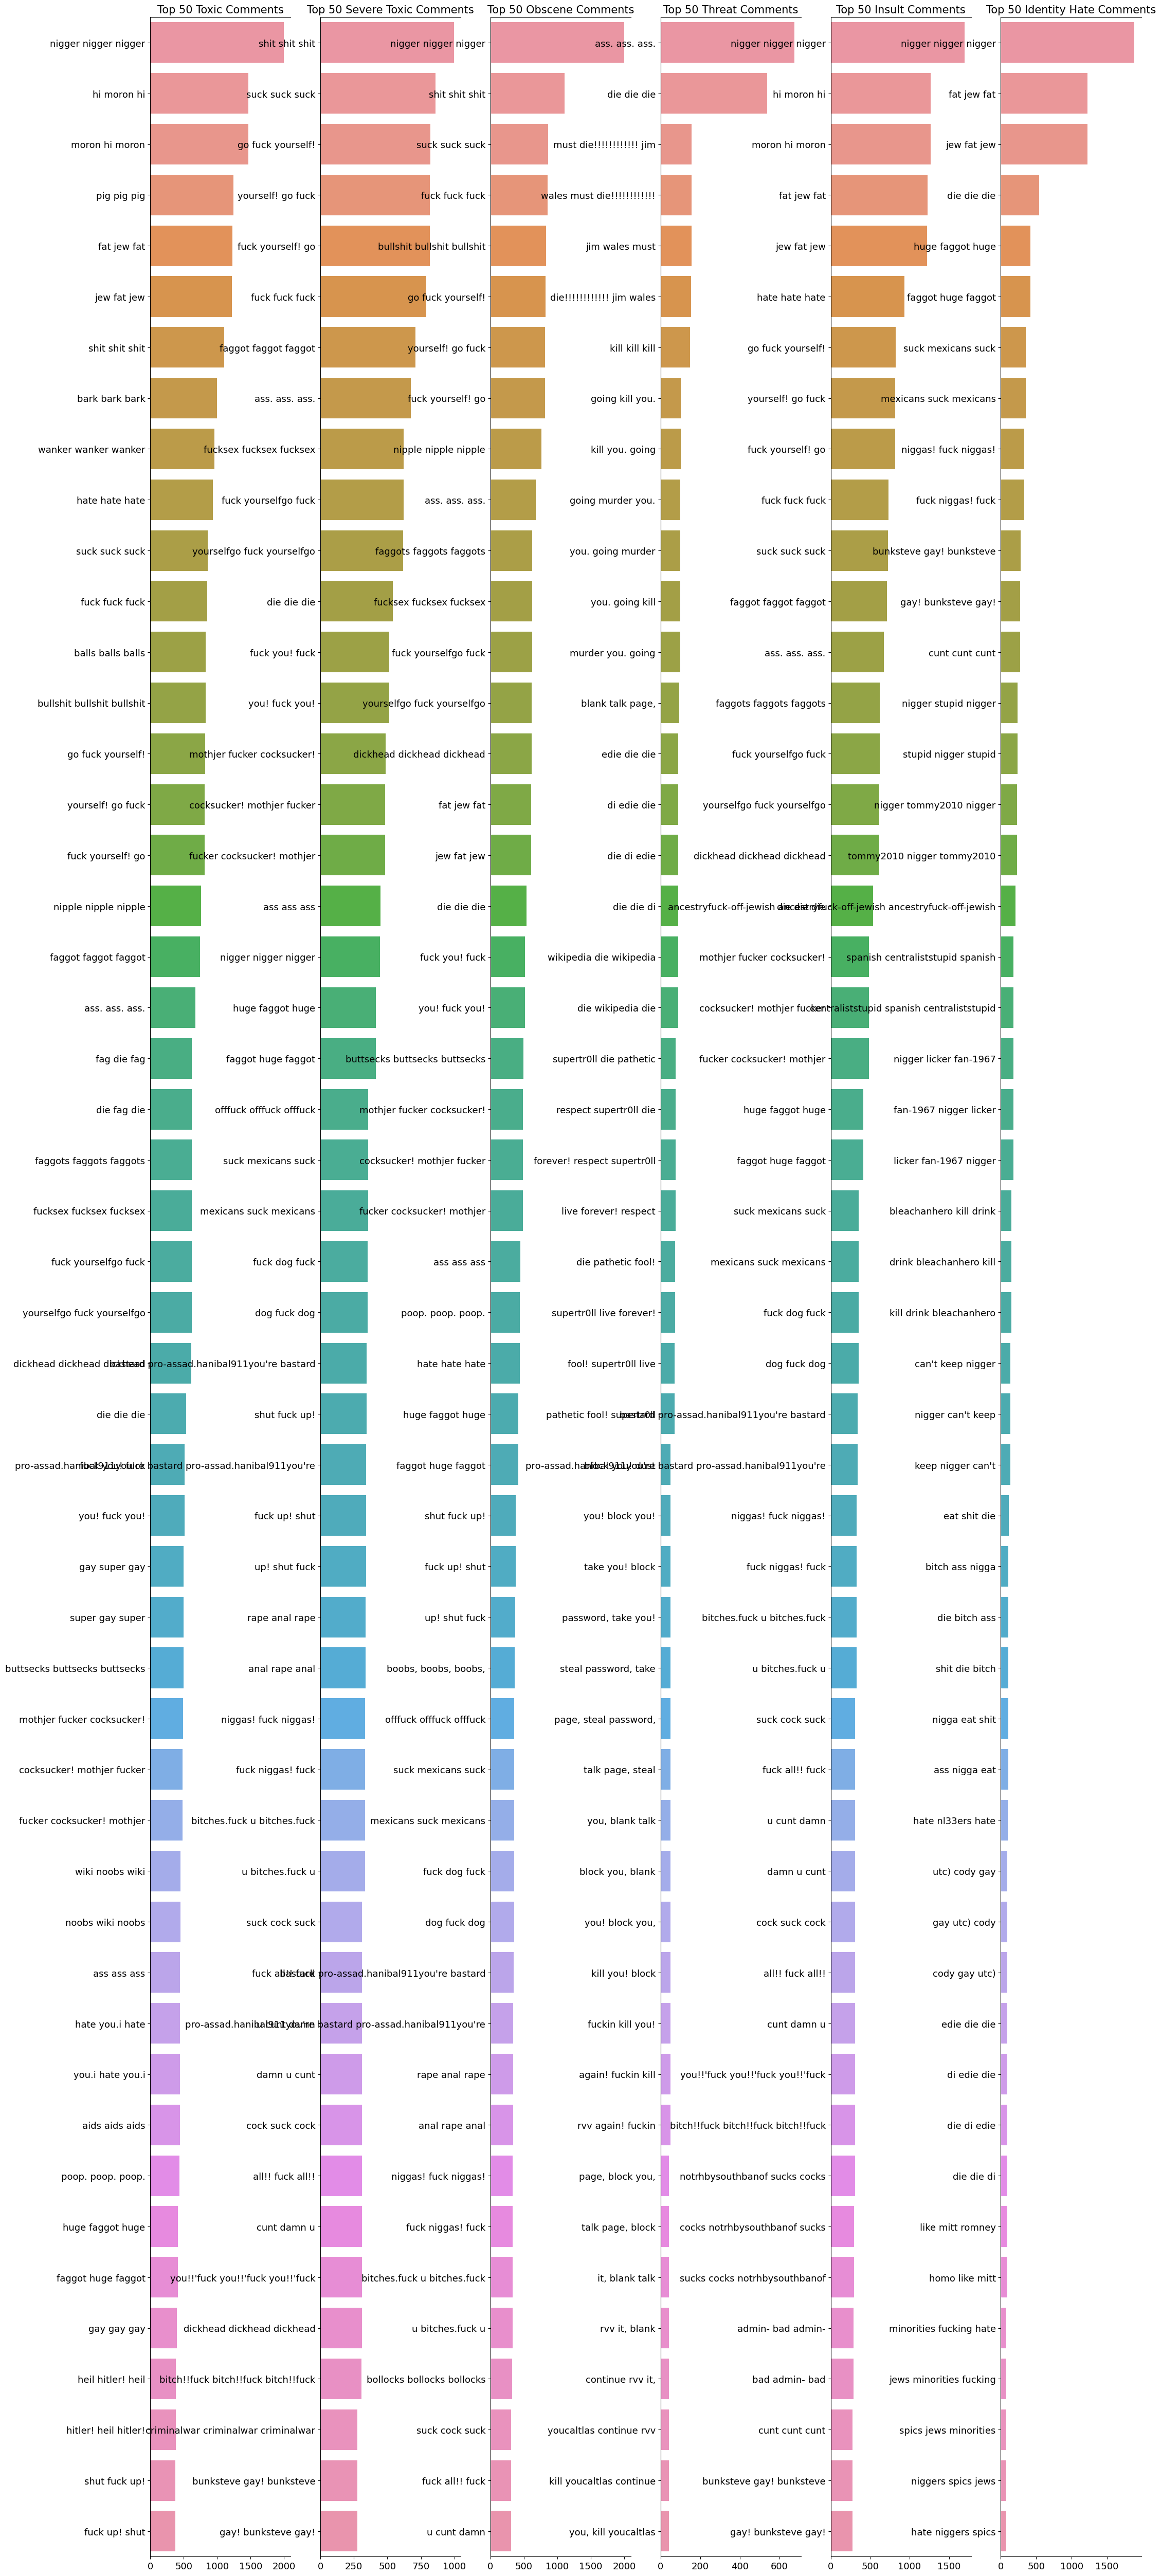

In [ ]:
fig, axes = plt.subplots(ncols = 6, figsize = (20, 50), dpi=100)
plt.tight_layout()

num = 50
sns.barplot(y=toxic_trigram_DF[0].values[:num], x =toxic_trigram_DF[1].values[:num], ax=axes[0])
sns.barplot(y=severe_toxic_DF[0].values[:num], x =severe_toxic_DF[1].values[:num], ax=axes[1])
sns.barplot(y=obscene_trigram_DF[0].values[:num], x =obscene_trigram_DF[1].values[:num], ax=axes[2])
sns.barplot(y=threat_trigram_DF[0].values[:num], x =threat_trigram_DF[1].values[:num], ax=axes[3])
sns.barplot(y=insult_trigram_DF[0].values[:num], x =insult_trigram_DF[1].values[:num], ax=axes[4])
sns.barplot(y=identity_hate_trigram_DF[0].values[:num], x =identity_hate_trigram_DF[1].values[:num], ax=axes[5])

for i in range(6):
    axes[i].spines['right'].set_visible(False)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='x', labelsize = 13)
    axes[i].tick_params(axis='y', labelsize = 13)
    
axes[0].set_title(f'Top {num} Toxic Comments', fontsize = 15)
axes[1].set_title(f'Top {num} Severe Toxic Comments', fontsize = 15)
axes[2].set_title(f'Top {num} Obscene Comments', fontsize = 15)
axes[3].set_title(f'Top {num} Threat Comments', fontsize = 15)
axes[4].set_title(f'Top {num} Insult Comments', fontsize = 15)
axes[5].set_title(f'Top {num} Identity Hate Comments', fontsize = 15)

plt.show()

## Data Cleaning

In [ ]:
pip install contractions

     |████████████████████████████████| 284 kB 8.5 MB/s 
     |████████████████████████████████| 321 kB 63.3 MB/s 
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.2-cp37-cp37m-linux_x86_64.whl size=85443 sha256=6661d769f50a8199ea5f539945bcba9543c1442af57e60171a558c9047d333f7
  Stored in directory: /root/.cache/pip/wheels/25/19/a6/8f363d9939162782bb8439d886469756271abc01f76fbd790f
Successfully built pyahocorasick


In [ ]:
import contractions

In [ ]:
# Basic Example of how contractions work
print(contractions.fix('''I'll be there within 5 min. Shouldn't you be there too? 
          I'd love to see u there my dear. It's awesome to meet new friends.
          We've been waiting for this day for so long.'''))

I will be there within 5 min. Should not you be there too? 
          I would love to see you there my dear. It is awesome to meet new friends.
          We have been waiting for this day for so long.


In [ ]:
train_data['comment_text'] = train_data['comment_text'].apply(lambda x: contractions.fix(x))
train_data

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,char_count,word_count
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,264,43
1,000103f0d9cfb60f,D'aww! He matches this background colour I am ...,0,0,0,0,0,0,112,17
2,000113f07ec002fd,"Hey man, I am really not trying to edit war. I...",0,0,0,0,0,0,233,42
3,0001b41b1c6bb37e,"""\nMore\nI cannot make any real suggestions on...",0,0,0,0,0,0,622,113
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,67,13
...,...,...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0,295,47
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0,99,18
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, there is no actual article fo...",0,0,0,0,0,0,81,12
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0,116,25


## Fitting processed/cleaned data using LogisticRegression (one vs rest)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split

In [ ]:
train_data.columns[2:-2]

Index(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate'],
      dtype='object')

In [ ]:
import nltk
from nltk.stem.snowball import SnowballStemmer

snow_stemmer = SnowballStemmer(language='english')

def apply_stemmer(text):
    words = text.split()
    sent = [snow_stemmer.stem(word) for word in words if not word in stops]
    return ' '.join(sent)

In [ ]:
x, y = train_data['comment_text'].apply(apply_stemmer).values, train_data[train_data.columns[2:-2]].values

In [ ]:
x[2]

'hey man, i realli tri edit war. it guy constant remov relev inform talk edit instead talk page. he seem care format actual info.'

In [ ]:
train_data['comment_text'][2]

'Hey man, I am really not trying to edit war. It is just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than the actual info.'

In [ ]:
# stemming using PortStemmer and SnowballStemmer didn't seems to work in this case (words after stemming don't make much sense), as it can be seen from above
# POS_tags can be used instead - KISI ko POS karna aata to kar do :/

In [ ]:
train_data[train_data.columns[2:-2]].values

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(train_data['comment_text'].values, train_data[train_data.columns[2:-2]].values, random_state=0)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
train_set = {"the sky is blue", "the sun is bright"}
count_vec = CountVectorizer(max_features=3)
a = count_vec.fit_transform(train_set)
a.todense()

matrix([[1, 1, 1],
        [0, 1, 1]])

In [ ]:
count_vec.get_feature_names_out()

array(['blue', 'is', 'the'], dtype=object)

In [ ]:
count_vectorizer = CountVectorizer(ngram_range=(1, 3),
                                   stop_words='english',
                                   strip_accents='unicode',
                                   token_pattern=r'\w{1,}',
                                   lowercase=True)

In [ ]:
x_train = count_vectorizer.fit_transform(x_train)

In [ ]:
x_test= count_vectorizer.transform(x_test)

In [ ]:
# way too large data, can't convert sparse matrix into noraml ndarray, Need collab pro to if want to look at sparse matrix in ndarray form.
# x_train.todense()

In [ ]:
x_valid_test = count_vectorizer.transform(test_data['comment_text'])    #using test.csv provided to us

In [ ]:
len(test_data['comment_text'])

153164

In [ ]:
x_valid_test.shape[0]

153164

In [ ]:
x_valid_test

<153164x5298503 sparse matrix of type '<class 'numpy.int64'>'
	with 5732742 stored elements in Compressed Sparse Row format>

In [ ]:
# max iter = 10000 se kaam ho jaana cahihye, vaise warning se code mein nahi dikkat aa rha
log_reg = LogisticRegression(C=10, solver = 'liblinear', random_state=0)

oneVS_rest = OneVsRestClassifier(log_reg)
oneVS_rest.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number

OneVsRestClassifier(estimator=LogisticRegression(C=10, random_state=0,
                                                 solver='liblinear'))

In [ ]:
y_train_pred = oneVS_rest.predict_proba(x_train)
y_test_pred = oneVS_rest.predict_proba(x_test)

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score_train_data = roc_auc_score(y_train, y_train_pred, average ="weighted")
roc_auc_score_test_data = roc_auc_score(y_test, y_test_pred, average = "weighted")


In [ ]:
print("ROC AUC score on Train data: ", roc_auc_score_train_data)
print("ROC AUC score on Test data: ", roc_auc_score_test_data)

ROC AUC score on Train data:  0.9806389501119348
ROC AUC score on Test data:  0.9529685858787179


In [ ]:
len(y_test_pred)

39893

In [ ]:
y_valid_test_pred = oneVS_rest.predict_proba(x_valid_test)
len(y_valid_test_pred)

153164

In [ ]:
test_predictionDF = pd.DataFrame({
    'id' : test_data['id'],
    'toxic' : y_valid_test_pred[:, 0],
    'severe_toxic' : y_valid_test_pred[:, 1],
    'obscene' : y_valid_test_pred[:, 2],
    'threat' : y_valid_test_pred[:, 3],
    'insult' : y_valid_test_pred[:, 4],
    'identity_hate' : y_valid_test_pred[:, 5]
})

In [ ]:
# prediction on given test.csv
test_predictionDF.head(10)

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,0.999943,0.123933,0.998944,0.015659,0.901872,0.241936
1,0000247867823ef7,0.059549,0.011732,0.039721,0.003324,0.053483,0.011301
2,00013b17ad220c46,0.080915,0.010874,0.040271,0.003021,0.054113,0.011234
3,00017563c3f7919a,0.006519,0.002669,0.007024,0.000414,0.014223,0.001729
4,00017695ad8997eb,0.083177,0.009145,0.040783,0.001970,0.048809,0.009600
5,0001ea8717f6de06,0.028958,0.004774,0.021467,0.000965,0.030794,0.005342
6,00024115d4cbde0f,0.007849,0.001814,0.009258,0.000239,0.016417,0.001501
7,000247e83dcc1211,0.205875,0.013008,0.064160,0.004170,0.081005,0.012871
8,00025358d4737918,0.001800,0.000401,0.006566,0.000446,0.011401,0.000912
9,00026d1092fe71cc,0.006310,0.001027,0.007621,0.000181,0.013813,0.002173
